In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Load the dataset
data = pd.read_excel("heart_disease.xlsx")

In [3]:
# Display the first few rows of the dataframe
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
# Check the structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
# Check for missing values
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [ ]:
# Summary statistics
data.describe()

In [12]:
# Check for unique values in the problematic columns
print("\nUnique values in 'fbs' column:", data['fbs'].unique())
print("\nUnique values in 'exang' column:", data['exang'].unique())


Unique values in 'fbs' column: [1 0]

Unique values in 'exang' column: [False True 'FALSE' 'TURE']


In [14]:
# Handle NaN values by filling with a default value (e.g., 0) and then converting 'TRUE'/'FALSE' strings to boolean and then to integers
data['fbs'] = data['fbs'].map({'TRUE': True, 'FALSE': False}).fillna(False).astype(int)
data['exang'] = data['exang'].map({'TRUE': True, 'FALSE': False}).fillna(False).astype(int)

In [15]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in ['sex', 'cp', 'restecg', 'slope', 'thal']:
    data[column] = le.fit_transform(data[column].astype(str))

In [17]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = data.drop('num', axis=1)
y = data['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
# Predict on the test set
y_pred = clf.predict(X_test)


In [22]:
# Evaluate the model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Confusion Matrix:
 [[72 13  2  2  0]
 [20 20  5  3  0]
 [ 6  8  2  6  0]
 [ 7  5  1  3  1]
 [ 1  1  2  2  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74        89
           1       0.43      0.42      0.42        48
           2       0.17      0.09      0.12        22
           3       0.19      0.18      0.18        17
           4       0.00      0.00      0.00         6

    accuracy                           0.53       182
   macro avg       0.29      0.30      0.29       182
weighted avg       0.48      0.53      0.50       182


Accuracy Score: 0.532967032967033


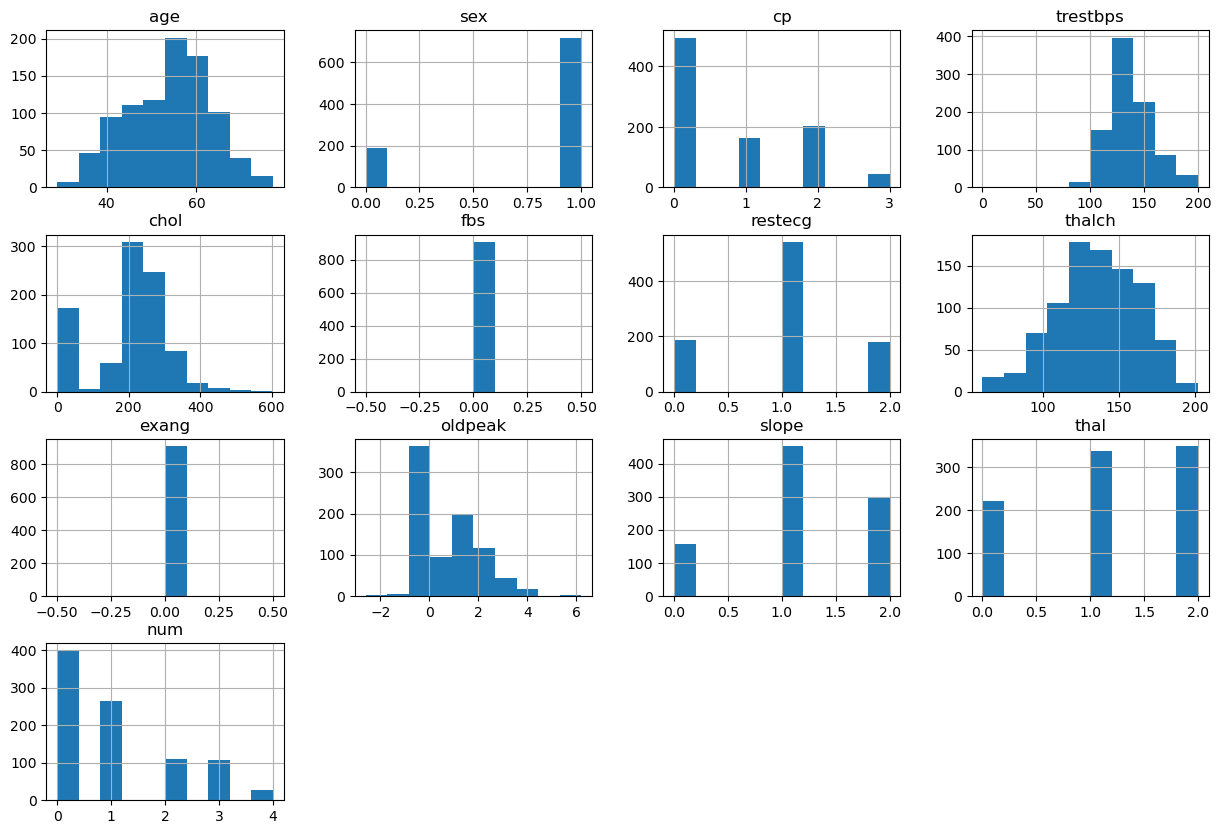

In [23]:
# Visualizations
# Histograms
data.hist(figsize=(15, 10))
plt.show()

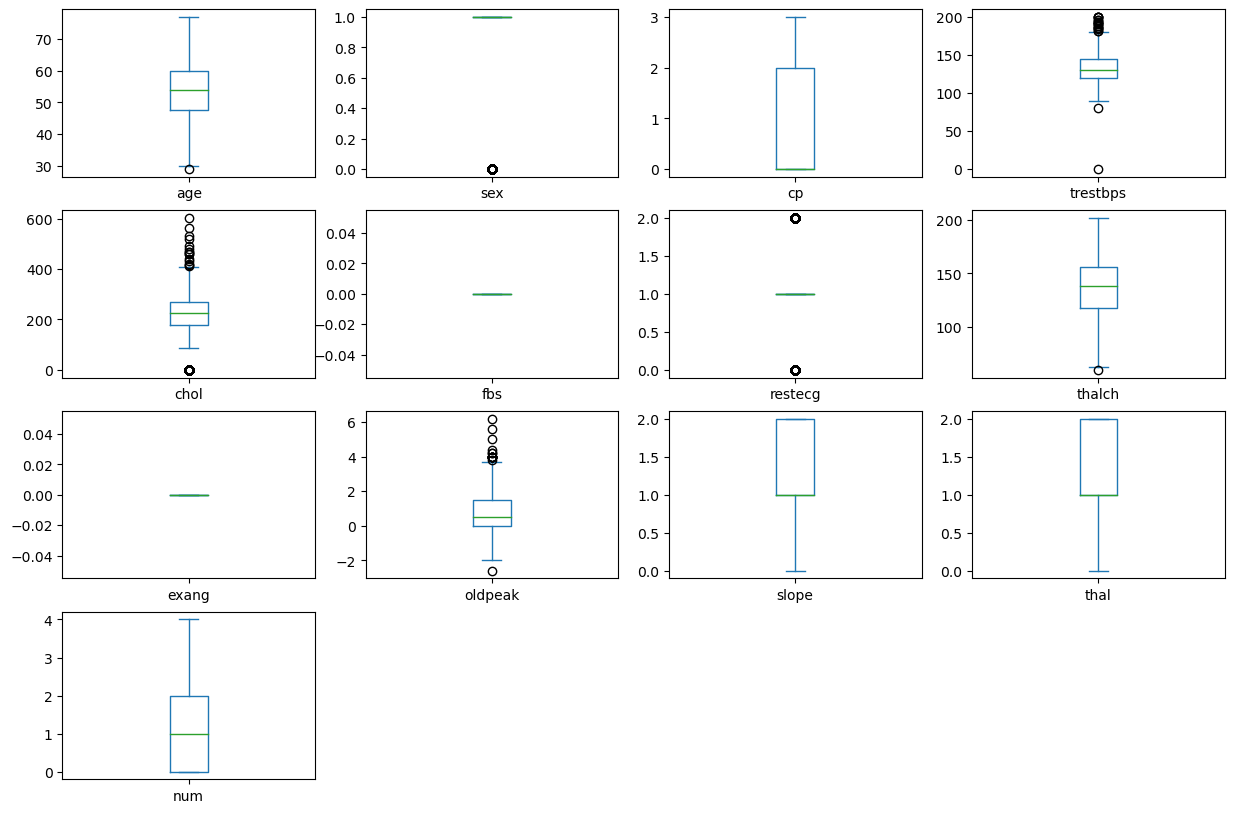

In [24]:
# Box plots
data.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10))
plt.show()

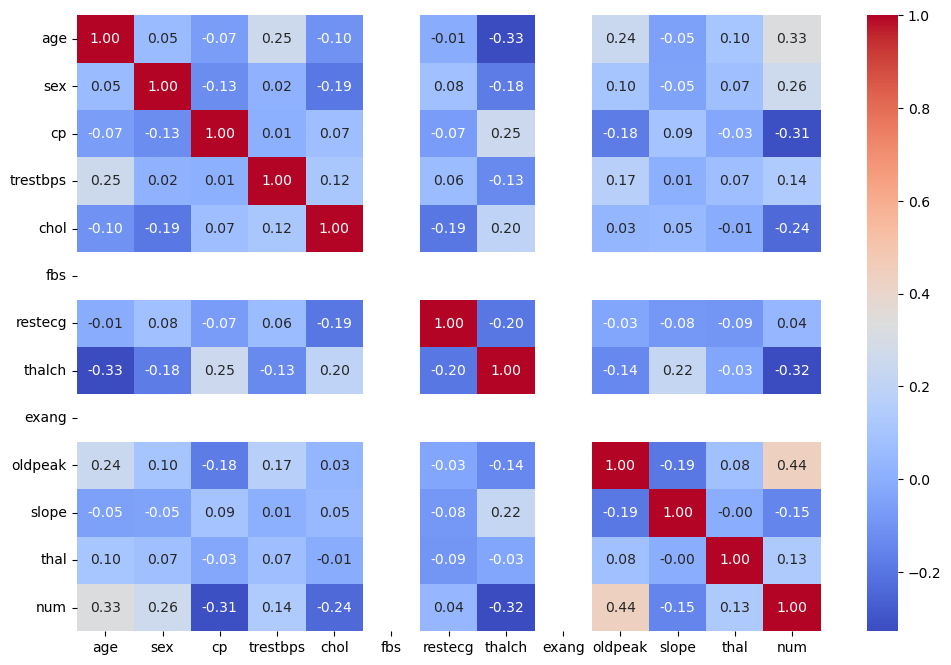

In [25]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()